In [51]:
import pandas as pd
import numpy as np
import pandas as pd

In [52]:
df = pd.read_csv("DT-BrainCancer.csv")
df.isnull()

,Unnamed: 0,sex,diagnosis,loc,ki,gtv,status
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
83,False,False,False,False,False,False,False
84,False,False,False,False,False,False,False
85,False,False,False,False,False,False,False
86,False,False,False,False,False,False,False


In [53]:
df = df.drop(columns=['Unnamed: 0'])
df

,sex,diagnosis,loc,ki,gtv,status
0,Female,Meningioma,Infratentorial,90,6.11,0
1,Male,HG glioma,Supratentorial,90,19.35,1
2,Female,Meningioma,Infratentorial,70,7.95,0
3,Female,LG glioma,Supratentorial,80,7.61,1
4,Male,HG glioma,Supratentorial,90,5.06,1
...,...,...,...,...,...,...
83,Male,HG glioma,Supratentorial,80,0.16,1
84,Male,HG glioma,Supratentorial,80,19.81,1
85,Male,Meningioma,Supratentorial,90,2.50,0
86,Male,Meningioma,Supratentorial,90,2.02,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        88 non-null     object 
 1   diagnosis  87 non-null     object 
 2   loc        88 non-null     object 
 3   ki         88 non-null     int64  
 4   gtv        88 non-null     float64
 5   status     88 non-null     int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 4.3+ KB


In [55]:
df_new = pd.get_dummies(df,columns = ['sex','diagnosis','loc'])
df_new.head

<bound method NDFrame.head of     ki    gtv  status  sex_Female  sex_Male  diagnosis_HG glioma  \
0   90   6.11       0        True     False                False   
1   90  19.35       1       False      True                 True   
2   70   7.95       0        True     False                False   
3   80   7.61       1        True     False                False   
4   90   5.06       1       False      True                 True   
..  ..    ...     ...         ...       ...                  ...   
83  80   0.16       1       False      True                 True   
84  80  19.81       1       False      True                 True   
85  90   2.50       0       False      True                False   
86  90   2.02       0       False      True                False   
87  80   0.11       0       False      True                False   

    diagnosis_LG glioma  diagnosis_Meningioma  diagnosis_Other  \
0                 False                  True            False   
1                 Fal

In [56]:
df_new.columns

Index(['ki', 'gtv', 'status', 'sex_Female', 'sex_Male', 'diagnosis_HG glioma',
       'diagnosis_LG glioma', 'diagnosis_Meningioma', 'diagnosis_Other',
       'loc_Infratentorial', 'loc_Supratentorial'],
      dtype='object')

In [57]:
y = df_new['status']
X = df_new.drop(columns=['status'])

Yarr = y.to_numpy()
Xarr = X.to_numpy()

print("Shape of Y:", Yarr.shape)
print("Shape of X:", Xarr.shape)

Shape of Y: (88,)
Shape of X: (88, 10)


In [58]:
import numpy as np

def shuffle_and_split_data(X, Y, test_ratio, val_ratio):
    # Shuffle indices
    shuffled_indices = np.random.permutation(len(X))
    
    # Calculate the sizes for test and validation sets
    test_set_size = int(len(X) * test_ratio)
    val_set_size = int(len(X) * val_ratio)
    
    # Get indices for each set
    test_indices = shuffled_indices[:test_set_size]
    val_indices = shuffled_indices[test_set_size:test_set_size + val_set_size]
    train_indices = shuffled_indices[test_set_size + val_set_size:]
    
    # Split the data
    return (X[train_indices], X[val_indices], X[test_indices], 
            Y[train_indices], Y[val_indices], Y[test_indices])

In [59]:
Xtrain_set, Xval_set, Xtest_set, Ytrain_set, Yval_set, Ytest_set = shuffle_and_split_data(Xarr, Yarr, test_ratio=0.15, val_ratio=0.15)

In [60]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [61]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [62]:
clf = DecisionTreeClassifier(max_depth=8,random_state=42)

In [63]:
clf.fit(Xtrain_set,Ytrain_set)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [64]:
y_val_pred = clf.predict(Xval_set)

In [76]:
def manual_accuracy(y_true, y_pred):
    correct_predictions = sum(y_true == y_pred)
    total_predictions = len(y_true)
    return correct_predictions / total_predictions

In [77]:
val_accuracy_dt= manual_accuracy(Yval_set, y_val_pred)
print("Validation Accuracy :", val_accuracy_dt)

Validation Accuracy : 0.7692307692307693


In [78]:
y_test_pred = clf.predict(Xtest_set)
test_accuracy_dt = manual_accuracy(Ytest_set, y_test_pred)
print("Test Accuracy :", test_accuracy_dt)

Test Accuracy : 0.6923076923076923


In [68]:
import xgboost as xgb

# Prepare data for XGBoost
xgb_train = xgb.DMatrix(Xtrain_set, label=Ytrain_set, enable_categorical=True)
xgb_val = xgb.DMatrix(Xval_set, label=Yval_set, enable_categorical=True)
xgb_test = xgb.DMatrix(Xtest_set, label=Ytest_set , enable_categorical=True)

# Define XGBoost parameters for multi-class classification
num_classes = len(set(Ytrain_set))  # Automatically detect the number of classes

# Set hyperparameters
params = {
    "objective": "binary:logistic",  # Binary classification
    "eval_metric": "logloss",       # Logarithmic loss for validation
    "max_depth": 8,                 # Max tree depth
    "eta": 0.01,                     # Learning rate
    "random_state": 42
}

# Train the model
bst = xgb.train(
    params,
    xgb_train,
    num_boost_round=1000,            # Number of boosting rounds
    early_stopping_rounds=50,       # Early stopping using validation set
    evals=[(xgb_val, "validation")]
)

# Predict on the test set
y_test_pred = bst.predict(xgb_train)


[0]	validation-logloss:0.61718
[1]	validation-logloss:0.61517
[2]	validation-logloss:0.61320
[3]	validation-logloss:0.61127
[4]	validation-logloss:0.60939
[5]	validation-logloss:0.60755
[6]	validation-logloss:0.60576
[7]	validation-logloss:0.60401
[8]	validation-logloss:0.60230
[9]	validation-logloss:0.60063
[10]	validation-logloss:0.59900
[11]	validation-logloss:0.59741
[12]	validation-logloss:0.59585
[13]	validation-logloss:0.59434
[14]	validation-logloss:0.59286
[15]	validation-logloss:0.59141
[16]	validation-logloss:0.59001
[17]	validation-logloss:0.58863
[18]	validation-logloss:0.58730
[19]	validation-logloss:0.58599
[20]	validation-logloss:0.58472
[21]	validation-logloss:0.58358
[22]	validation-logloss:0.58237
[23]	validation-logloss:0.58130
[24]	validation-logloss:0.58015
[25]	validation-logloss:0.57914
[26]	validation-logloss:0.57805
[27]	validation-logloss:0.57710
[28]	validation-logloss:0.57607
[29]	validation-logloss:0.57518
[30]	validation-logloss:0.57420
[31]	validation-lo

In [69]:
def accuracy(y_true, y_pred):
    TP, FP, TN, FN = confusion_matrix(y_true, y_pred)
    return (TP + TN) / (TP + TN + FP + FN)

In [70]:
def confusion_matrix(y_true, y_pred):
    TP = sum((y_true == 1) & (y_pred == 1))
    FP = sum((y_true == 0) & (y_pred == 1))
    TN = sum((y_true == 0) & (y_pred == 0))
    FN = sum((y_true == 1) & (y_pred == 0))
    return TP, FP, TN, FN

In [71]:
def precision(y_true, y_pred):
    TP, FP, TN, FN = confusion_matrix(y_true, y_pred)
    return TP / (TP + FP) if (TP + FP) != 0 else 0

In [72]:
def recall(y_true, y_pred):
    TP, FP, TN, FN = confusion_matrix(y_true, y_pred)
    return TP / (TP + FN) if (TP + FN) != 0 else 0

In [73]:
def f_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * (prec * rec) / (prec + rec) if (prec + rec) != 0 else 0

In [74]:
print("Accuracy (Manual):", accuracy(Yval_set, y_val_pred))
TP, FP, TN, FN = confusion_matrix(Yval_set, y_val_pred)
print("Confusion Matrix (Manual):")
print(f"TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}")
print("Precision (Manual):", precision(Yval_set, y_val_pred))
print("Recall (Manual):", recall(Yval_set, y_val_pred))
print("F-Score (Manual):", f_score(Yval_set, y_val_pred))

Accuracy (Manual): 0.7692307692307693
Confusion Matrix (Manual):
TP: 2, FP: 2, TN: 8, FN: 1
Precision (Manual): 0.5
Recall (Manual): 0.6666666666666666
F-Score (Manual): 0.5714285714285715


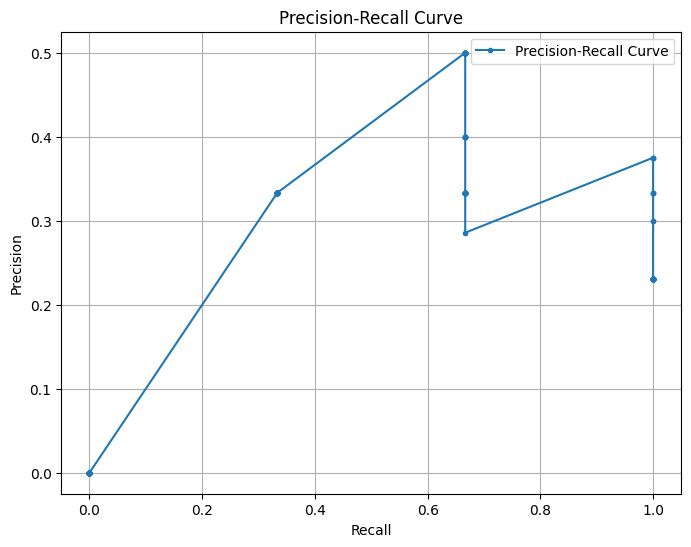

In [75]:
import numpy as np
import matplotlib.pyplot as plt

y_val_prob = bst.predict(xgb_val)  
y_val_true = Yval_set  


y_val_true = np.array(y_val_true)

def precision_recall_curve_manual(y_true, y_prob, thresholds):
    precisions = []
    recalls = []
    
    for threshold in thresholds:
        # Binary predictions using the threshold
        y_pred = (y_prob >= threshold).astype(int)
        
        # True Positives, False Positives, False Negatives
        TP = np.sum((y_true == 1) & (y_pred == 1))
        FP = np.sum((y_true == 0) & (y_pred == 1))
        FN = np.sum((y_true == 1) & (y_pred == 0))
        
        # Precision and Recall calculations
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        
        precisions.append(precision)
        recalls.append(recall)
    
    return precisions, recalls


thresholds = np.linspace(0, 1, 100)


precisions, recalls = precision_recall_curve_manual(y_val_true, y_val_prob, thresholds)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, marker='.', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()